  APPLYING LOGISTIC REGRESSION FOR AMAZON DATASET
  ====================================



To apply Logistic regression and do hyperparameter tunning by Grid-search and Random-search for both L1 an L2  regularization.
-----------

In [0]:
!pip install -U -q Pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [0]:

# authenticate
auth.authenticate_user()
gauth= GoogleAuth()
gauth.credentials= GoogleCredentials.get_application_default()
drive=GoogleDrive(gauth)

In [0]:
train_downloaded = drive.CreateFile({'id': '1LgNo7LS202N7BuUaQQt4tVwchHRJm8S9'})
train_downloaded.GetContentFile('final_clean.csv')

In [0]:
df=pd.read_csv('final_clean.csv')
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleanedText
0,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,b'witti littl book make son laugh loud recit c...
1,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",b'grew read sendak book watch realli rosi movi...


In [0]:
data1=df.sample(3000, random_state=23)
data1.shape

(3000, 11)

In [0]:
data = data1.filter(['cleanedText','Text','Score'],axis=1)
data.head(2)



,cleanedText,Text,Score
10509,b'let say impress senseo machin never get coff...,Let me just say that I am so impressed with th...,1
279417,b'best snappl flavor ever hard find though how...,This is the best Snapple flavor I have ever ha...,1


In [0]:

from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

In [0]:
X = data['cleanedText']
y = data['Score']



SPLITTING DATA IN TO TRAIN AND TEST AND FEATURIZE TEXT UDING TF-IDF
--------------

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y)

y_train.shape


(2250,)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
    analyzer='word',  # features made of words
    ngram_range=(1,2))
tf_idf = tfidf_vect.fit_transform(x_train)
tfidf_xtest = tfidf_vect.transform(x_test)

In [0]:
w = tf_idf.todense()
w2=tfidf_xtest.todense()

OBTAINING OPTIMAL PENALITY(L1,L2) AND LAMBDA USING GRID-SEARCH CV
-------------

In [0]:
logistic = linear_model.LogisticRegression()

In [0]:
# Create regularization penalty space
penality=('l1','l2')

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penality)

In [0]:
cf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=30)

In [0]:
from datetime import datetime
startTime = datetime.now()

#lets run GridsearchCV on our data
bestmodel=cf.fit(w, y_train)

print(datetime.now() - startTime)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1.0, penalty=l1 ...............................................
[CV] ...... C=1.0, penalty=l1, score=0.8492239467849224, total=   1.5s
[CV] C=1.0, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] ...... C=1.0, penalty=l1, score=0.8377777777777777, total=   0.9s
[CV] C=1.0, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ...... C=1.0, penalty=l1, score=0.8311111111111111, total=   0.9s
[CV] C=1.0, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.0s remaining:    0.0s


[CV] ...... C=1.0, penalty=l1, score=0.8422222222222222, total=   0.9s
[CV] C=1.0, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s


[CV] ...... C=1.0, penalty=l1, score=0.8396436525612472, total=   0.9s
[CV] C=1.0, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.3s remaining:    0.0s


[CV] ....... C=1.0, penalty=l2, score=0.835920177383592, total=   0.9s
[CV] C=1.0, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.4s remaining:    0.0s


[CV] ...... C=1.0, penalty=l2, score=0.8355555555555556, total=   0.9s
[CV] C=1.0, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.5s remaining:    0.0s


[CV] ...... C=1.0, penalty=l2, score=0.8355555555555556, total=   0.9s
[CV] C=1.0, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    9.6s remaining:    0.0s


[CV] ...... C=1.0, penalty=l2, score=0.8355555555555556, total=   0.9s
[CV] C=1.0, penalty=l2 ...............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.7s remaining:    0.0s


[CV] ...... C=1.0, penalty=l2, score=0.8374164810690423, total=   0.9s
[CV] C=2.7825594022071245, penalty=l1 ................................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.9s remaining:    0.0s


[CV]  C=2.7825594022071245, penalty=l1, score=0.8869179600886918, total=   0.9s
[CV] C=2.7825594022071245, penalty=l1 ................................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   13.0s remaining:    0.0s


[CV]  C=2.7825594022071245, penalty=l1, score=0.8733333333333333, total=   0.9s
[CV] C=2.7825594022071245, penalty=l1 ................................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   14.2s remaining:    0.0s


[CV]  C=2.7825594022071245, penalty=l1, score=0.8688888888888889, total=   0.9s
[CV] C=2.7825594022071245, penalty=l1 ................................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   15.3s remaining:    0.0s


[CV]  C=2.7825594022071245, penalty=l1, score=0.8733333333333333, total=   0.9s
[CV] C=2.7825594022071245, penalty=l1 ................................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:   16.5s remaining:    0.0s


[CV]  C=2.7825594022071245, penalty=l1, score=0.8619153674832962, total=   0.9s
[CV] C=2.7825594022071245, penalty=l2 ................................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   17.6s remaining:    0.0s


[CV]  C=2.7825594022071245, penalty=l2, score=0.8403547671840355, total=   0.9s
[CV] C=2.7825594022071245, penalty=l2 ................................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:   18.8s remaining:    0.0s


[CV] ..... C=2.7825594022071245, penalty=l2, score=0.84, total=   0.9s
[CV] C=2.7825594022071245, penalty=l2 ................................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:   20.0s remaining:    0.0s


[CV]  C=2.7825594022071245, penalty=l2, score=0.8355555555555556, total=   0.9s
[CV] C=2.7825594022071245, penalty=l2 ................................


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   21.1s remaining:    0.0s


[CV]  C=2.7825594022071245, penalty=l2, score=0.8355555555555556, total=   0.9s
[CV] C=2.7825594022071245, penalty=l2 ................................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   22.2s remaining:    0.0s


[CV]  C=2.7825594022071245, penalty=l2, score=0.8374164810690423, total=   0.9s
[CV] C=7.742636826811269, penalty=l1 .................................


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   23.4s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l1, score=0.9135254988913526, total=   0.9s
[CV] C=7.742636826811269, penalty=l1 .................................


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   24.5s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l1, score=0.8977777777777778, total=   0.9s
[CV] C=7.742636826811269, penalty=l1 .................................


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:   25.7s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l1, score=0.9044444444444445, total=   0.9s
[CV] C=7.742636826811269, penalty=l1 .................................


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   26.9s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l1, score=0.8911111111111111, total=   0.9s
[CV] C=7.742636826811269, penalty=l1 .................................


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   28.0s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l1, score=0.8663697104677061, total=   0.9s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   29.2s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l2, score=0.8470066518847007, total=   0.9s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:   30.4s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l2, score=0.8444444444444444, total=   0.9s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   31.5s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l2, score=0.8444444444444444, total=   0.9s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:   32.7s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l2, score=0.8422222222222222, total=   0.9s
[CV] C=7.742636826811269, penalty=l2 .................................


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:   33.8s remaining:    0.0s


[CV]  C=7.742636826811269, penalty=l2, score=0.844097995545657, total=   0.9s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV]  C=21.544346900318832, penalty=l1, score=0.917960088691796, total=   0.9s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV]  C=21.544346900318832, penalty=l1, score=0.8888888888888888, total=   0.9s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV]  C=21.544346900318832, penalty=l1, score=0.8955555555555555, total=   0.9s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV]  C=21.544346900318832, penalty=l1, score=0.8777777777777778, total=   0.9s
[CV] C=21.544346900318832, penalty=l1 ................................
[CV]  C=21.544346900318832, penalty=l1, score=0.8641425389755011, total=   0.9s
[CV] C=21.544346900318832, penalty=l2 ................................
[CV]  C=21.544346900318832, penalty=l2, score=0.8536585365853658, total=   0.9s
[CV] C=21.5443469

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.0min finished


0:01:58.626006


In [0]:
print('Best Penalty:', bestmodel.best_estimator_.get_params()['penalty'])
print('Best C:', bestmodel.best_estimator_.get_params()['C'])


Best Penalty: l1
Best C: 7.742636826811269


In [0]:
y_true, y_pred = y_test,cf.predict(w2)


In [0]:

from sklearn.metrics import precision_recall_fscore_support, classification_report

print(classification_report(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))


             precision    recall  f1-score   support

          0       0.62      0.53      0.57        99
          1       0.93      0.95      0.94       651

avg / total       0.89      0.89      0.89       750

(0.8946666666666667, 0.8946666666666667, 0.8946666666666667, None)


OBTAINING OPTIMAL PENALITY(L1,L2) AND LAMBDA USING RANDOM-SEARCH CV
-------------

In [0]:
from sklearn.model_selection import RandomizedSearchCV
clf  =RandomizedSearchCV(logistic, hyperparameters, cv=5, verbose=10)

In [0]:
bestmodel1 = clf.fit(w,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=l2, C=10000.0 ...........................................
[CV] .. penalty=l2, C=10000.0, score=0.8625277161862528, total=   1.0s
[CV] penalty=l2, C=10000.0 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .. penalty=l2, C=10000.0, score=0.8688888888888889, total=   1.0s
[CV] penalty=l2, C=10000.0 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] .. penalty=l2, C=10000.0, score=0.8644444444444445, total=   1.0s
[CV] penalty=l2, C=10000.0 ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.8s remaining:    0.0s


[CV] .. penalty=l2, C=10000.0, score=0.8511111111111112, total=   1.0s
[CV] penalty=l2, C=10000.0 ...........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.1s remaining:    0.0s


[CV] .. penalty=l2, C=10000.0, score=0.8507795100222717, total=   1.0s
[CV] penalty=l2, C=3593.813663804626 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    6.4s remaining:    0.0s


[CV]  penalty=l2, C=3593.813663804626, score=0.8625277161862528, total=   1.0s
[CV] penalty=l2, C=3593.813663804626 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    7.6s remaining:    0.0s


[CV]  penalty=l2, C=3593.813663804626, score=0.8688888888888889, total=   1.0s
[CV] penalty=l2, C=3593.813663804626 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    8.9s remaining:    0.0s


[CV]  penalty=l2, C=3593.813663804626, score=0.8644444444444445, total=   1.0s
[CV] penalty=l2, C=3593.813663804626 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.2s remaining:    0.0s


[CV]  penalty=l2, C=3593.813663804626, score=0.8511111111111112, total=   1.0s
[CV] penalty=l2, C=3593.813663804626 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   11.4s remaining:    0.0s


[CV]  penalty=l2, C=3593.813663804626, score=0.8507795100222717, total=   0.9s
[CV] penalty=l1, C=1291.5496650148827 ................................
[CV]  penalty=l1, C=1291.5496650148827, score=0.8980044345898004, total=   1.0s
[CV] penalty=l1, C=1291.5496650148827 ................................
[CV]  penalty=l1, C=1291.5496650148827, score=0.8933333333333333, total=   1.0s
[CV] penalty=l1, C=1291.5496650148827 ................................
[CV]  penalty=l1, C=1291.5496650148827, score=0.8888888888888888, total=   1.0s
[CV] penalty=l1, C=1291.5496650148827 ................................
[CV]  penalty=l1, C=1291.5496650148827, score=0.8755555555555555, total=   1.0s
[CV] penalty=l1, C=1291.5496650148827 ................................
[CV]  penalty=l1, C=1291.5496650148827, score=0.8619153674832962, total=   1.0s
[CV] penalty=l2, C=464.15888336127773 ................................
[CV]  penalty=l2, C=464.15888336127773, score=0.8647450110864745, total=   0.9s
[CV] penalty=l2

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   59.9s finished


In [0]:
print('Best Penalty:', bestmodel1.best_estimator_.get_params()['penalty'])
print('Best C:', bestmodel1.best_estimator_.get_params()['C'])


Best Penalty: l1
Best C: 7.742636826811269


In [0]:
y_true, y_pred = y_test,clf.predict(w2)


In [0]:

from sklearn.metrics import precision_recall_fscore_support, classification_report

print(classification_report(y_test, y_pred))
print(precision_recall_fscore_support(y_test, y_pred, average='micro'))



             precision    recall  f1-score   support

          0       0.62      0.53      0.57        99
          1       0.93      0.95      0.94       651

avg / total       0.89      0.89      0.89       750

(0.8946666666666667, 0.8946666666666667, 0.8946666666666667, None)


Observing Sparcity in L1,L2 Regularization
------------------------

In [0]:
weights1 =[]
for item in C:
    lg = LogisticRegression(C=item, penalty='l1')
    lg.fit(w[0:1000],y_train[0:1000])
    weights1.append(np.count_nonzero(lg.coef_))

In [0]:
weights =[]
for item in C:
    lg = LogisticRegression(C=item, penalty='l2')
    lg.fit(w[0:1000],y_train[0:1000])
    weights.append(np.count_nonzero(lg.coef_)

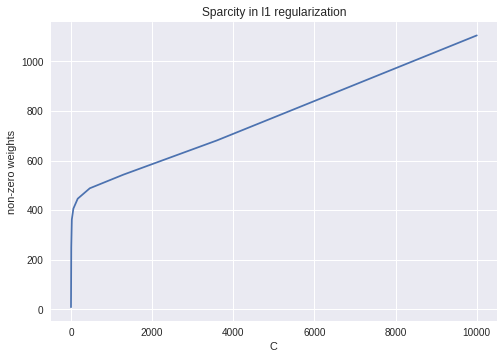

In [0]:
plt.plot(C,weights1)
ymin, ymax = plt.ylim()
plt.xlabel('C')
plt.ylabel('non-zero weights')
plt.title('Sparcity in l1 regularization')
plt.axis('tight')
plt.show()

#From the above plot we can clearly see that L1 regularization  creates sparsity


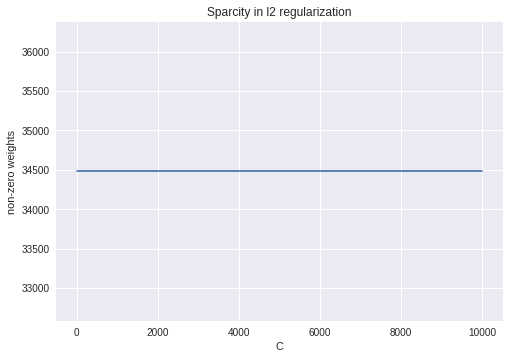

In [0]:
plt.plot(C,weights)
ymin, ymax = plt.ylim()
plt.xlabel('C')
plt.ylabel('non-zero weights')
plt.title('Sparcity in l2 regularization')
plt.axis('tight')
plt.show()

Checking Multicollinearity
-----------

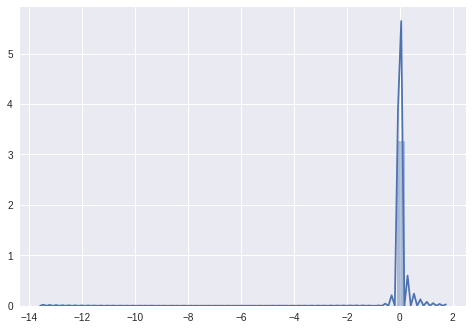

In [0]:
from sklearn.linear_model import LogisticRegression

import seaborn as ssb
noise = np.random.normal(loc=0.1,scale=0.1,size=100)
noise = noise.reshape(100,1)
noise_counts = w[0:100] + noise
l1 = LogisticRegression(C=7,penalty='l1')
l1.fit(w[0:100],y_train[0:100])
l2 = LogisticRegression(C=7,penalty='l1')
l2.fit(noise_counts,y_train[0:100])
weights = np.array(l1.coef_)
weight_noise = np.array(l2.coef_)
weight = np.subtract(weights,weight_noise)
ssb.distplot(weight)
plt.show()


**since the weights did not differ much i.e almost all the values are 0 we can use these features for modeling**

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
model = LogisticRegression(C=7,penalty='l1')
model.fit(w,y_train)
pred = model.predict(w2)
acc = accuracy_score(y_test,pred)
confusion = confusion_matrix(y_test,pred)
print('Accuracy on test set: ',acc*100,"%")
print('confusion matrix')
print(confusion)

Accuracy on test set:  89.60000000000001 %
confusion matrix
[[ 53  46]
 [ 32 619]]


In [0]:
model = LogisticRegression(C=7,penalty='l1')
model.fit(w,y_train)
pred = model.predict(w)
acc = accuracy_score(y_train,pred)
print('Accuracy on training set',acc*100,'%')

Accuracy on training set 97.2 %


In [0]:
feat = tfidf_vect.get_feature_names()
feat = np.array(feat).reshape(1,69808)
features = np.vstack((feat,np.absolute(model.coef_)))
features= pd.DataFrame(data=features.T,columns=('words','coefficients'))
top_feat= features.sort_values('coefficients',axis=0,inplace=False,ascending=False,kind='quicksort')
print('  Top 10 Feat ')
print(top_feat[0:10])

  Top 10 Feat 
            words       coefficients
29298        home  9.683420949353382
10424       chick  9.673354348199254
69572  youll find  9.446962758281025
29656  hot chocol  9.431074957993324
16249       didnt  9.332920914441534
32949       label  9.293406480505263
60309   tast like     9.287782308518
69174       write  9.218771142954218
68841       would   9.19104504377822
67391        well  9.116858827505174


Summary
======


1.  Using tfidf featurization  to get text vectors

2.  Obtaining optimal parameters using hyperparameter tuning using grid search and random search .

3.  Obtaining best penality (L1,L2) 
2.  Observing sparcity in  L1 and L2 regularization.


5.   Checking collinearity in features ,since featues are  not collinear we can use these features for modeling .
2. Obtaining  various performance measures of the model.

7.     Accuracy on training set is 97 and on test set is  89.

9.    Obtaining top most important features .

  





